#### Data Manipulation and Analysis with Pandas
Data manipulation and analysis are key tasks in any data science or data analysis project. Pandas provides a wide range of functions for data manipulation and analysis, making it easier to clean, transform, and extract insights from data. In this lesson, we will cover various data manipulation and analysis techniques using Pandas.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('data.csv')
## fetch the top 5 rows.
df.head(5)

In [ ]:
df.tail(5)

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
## Handling Missing Values
# df.isnull().any()
# df.isnull().sum()
df.isnull().mean() * 100

In [ ]:
df.isnull().sum()

In [ ]:
# creating another dataFrame where every null value is filled with 0s.
df_filled = df.fillna(0)

df_filled.isnull().sum()

In [ ]:
# changing every column name to lower.
# for i in df.columns:
#     i.lower()

df.rename(columns = {'Date': 'date', 'Category': 'category', 'Value': 'value', 'Product' : 'product', 'Sales': 'sales', 'Region': 'region'}, inplace=True)

In [ ]:
## filling missing values with the mean of the column
# df.info()
# df['value_FILLNA'] = df['value'].fillna(df['value'].mean())

df.head(1)

In [ ]:
df.dtypes

In [ ]:
## Renaming Columns
df.rename(columns = {'date': 'sale_date'}, inplace=True)

In [ ]:
## changing datatypes.
df['value_FILLNA'] = df['value_FILLNA'].astype(int)

AttributeError: 'Series' object has no attribute 'int'

In [ ]:
# df['New Value']=df['Value'].apply(lambda x:x*2)
# df.head()
# modifying columns inside pandas.
df['new_value']=df['value'].apply(lambda x: x*2)
df.head()

In [ ]:
## Data Aggregating And Grouping
df.head()

In [ ]:
# df.isnull().sum()
# df.drop(columns = ['new_value'], inplace=True)

# filling null values in value and mean values for respective columns.
df['value'] = df['value'].fillna(df['value'].mean())
df['sales'] = df['sales'].fillna(df['sales'].mean())

In [ ]:
# all nulls are filled.
df.info()

In [ ]:
# aggregate functions on more than one column.

# grouped_sum=df.groupby('product')['sales'].mean()
# grouped_sum

# grouped_sum=df.groupby(['Product','Region'])['Value'].sum()
# print(grouped_sum)

grouped_sum=df.groupby(['region', 'product'])['sales'].mean()
grouped_sum

In [ ]:
df.groupby(['region', 'product'])['value'].mean()

<Axes: title={'center': 'value distribution among region & category'}, xlabel='regional_category'>

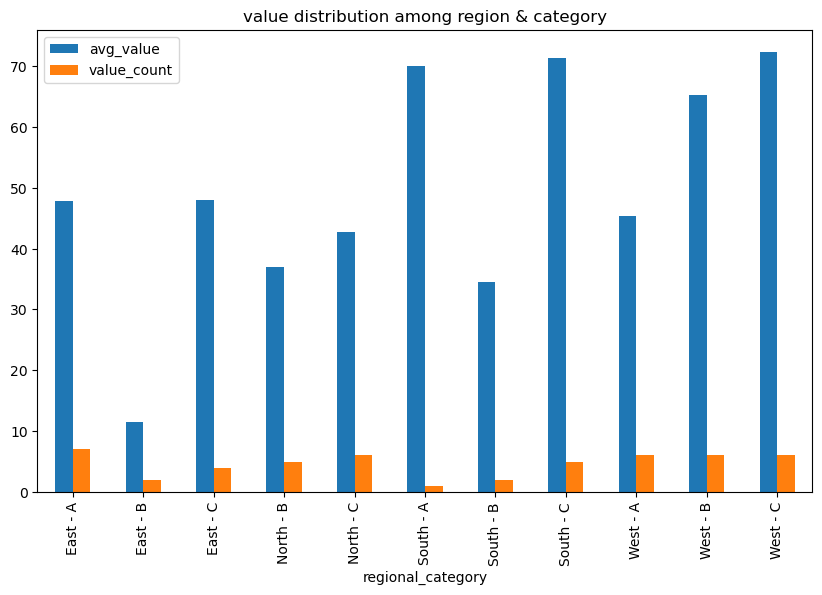

In [79]:
#applying multiple aggregate functions.

grouped_value = (
    df.groupby(['region', 'category'], as_index=False).agg
    (
        avg_value = ('value', 'mean'),
        value_count = ('value', 'count')
    )
)

# creating another column (temporary) in grouped_value variable.
grouped_value['regional_category'] = (
    grouped_value['region'] + ' - ' + grouped_value['category']
)

grouped_value.reset_index().plot(x = 'regional_category', y = ['avg_value', 'value_count'], kind = 'bar', figsize=(10, 6), title = 'value distribution among region & category')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sale_date     50 non-null     object 
 1   category      50 non-null     object 
 2   value         50 non-null     float64
 3   product       50 non-null     object 
 4   sales         50 non-null     float64
 5   region        50 non-null     object 
 6   value_FILLNA  50 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB


In [78]:
# changing datatype of columns.
df['value'] = df['value'].astype(int)
df['value_FILLNA'] = df['value_FILLNA'].astype(int)

<Axes: title={'center': 'month wise avg sales value in every region'}, xlabel='region_month'>

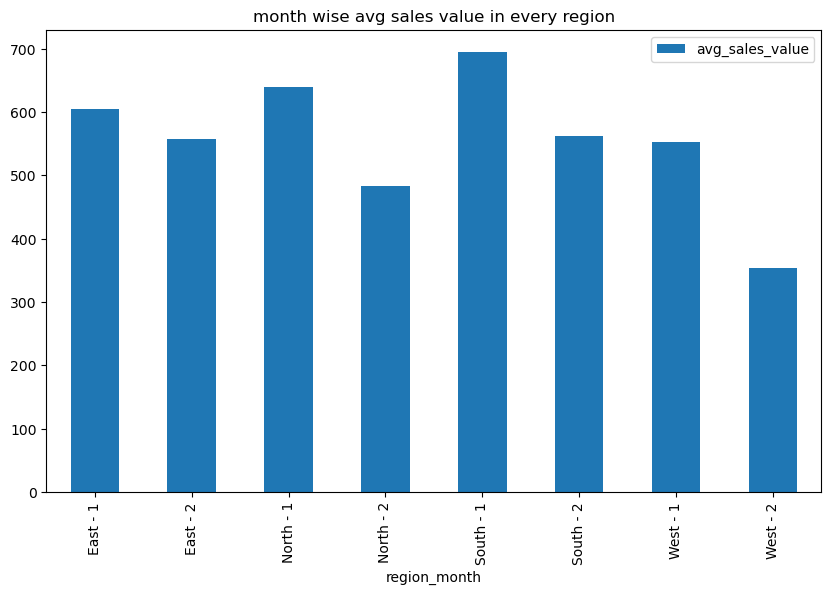

In [90]:
# month wise per region average sales value.

# df['sale_date'] = pd.to_datetime(df['sale_date'], format = 'mixed')
# df['month'] = df['sale_date'].dt.month
df['month'] = df['month'].astype(str)
month_wise_avg_sales = (
    df.groupby(['region', 'month'], as_index=False).agg(
        avg_sales_value = ('sales', 'mean')
    )
)

month_wise_avg_sales['region_month'] = (month_wise_avg_sales['region'] + " - " + month_wise_avg_sales['month'])

month_wise_avg_sales.plot(x = 'region_month', y = 'avg_sales_value', kind = 'bar', figsize=(10, 6), title='month wise avg sales value in every region')

<Axes: title={'center': 'month wise product avg sales'}, xlabel='region_product'>

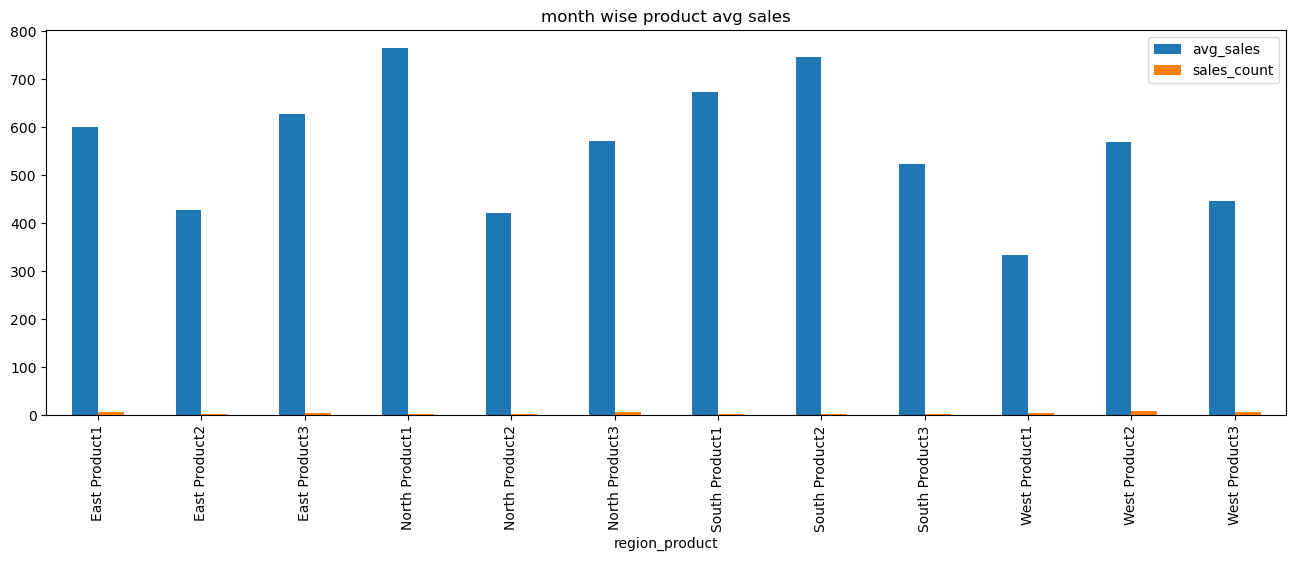

In [96]:
# month wise product sales.

month_wise_product = (
    df.groupby(['region', 'product'], as_index=False).agg
    (
        avg_sales = ('sales', 'mean'),
        sales_count = ('sales', 'count')
    )
)

month_wise_product['region_product'] = (month_wise_product['region']+ " " + month_wise_product['product'])

month_wise_product.plot(x = 'region_product', y = ['avg_sales', 'sales_count'], kind = 'bar', figsize=(16, 5), title='month wise product avg sales')

In [ ]:

### Merging and joining Dataframes
# Create sample DataFrames
# df1 = pd.DataFrame({'Key': ['A', 'B', 'C'], 'Value1': [1, 2, 3]})
# df2 = pd.DataFrame({'Key': ['A', 'B', 'D'], 'Value2': [4, 5, 6]})

df1 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value1': [1,2,3]})
df2 = pd.DataFrame({'key': ['D', 'E', 'F'], 'value2': [4,5,6]})

In [54]:
df1

,key,value1
0,A,1
1,B,2
2,C,3


In [55]:
df2

,key,value2
0,D,4
1,E,5
2,F,6


In [59]:
## Merge Datafranme on the 'Key Columns'
pd.merge(df1, df2, on = "key", how="inner")

,key,value1,value2


In [61]:
pd.merge(df1, df2, on='key', how = 'outer')

,key,value1,value2
0,A,1.0,NaN
1,B,2.0,NaN
2,C,3.0,NaN
3,D,NaN,4.0
4,E,NaN,5.0
5,F,NaN,6.0


In [63]:
pd.merge(df1,df2,on="key",how="left")

,key,value1,value2
0,A,1,NaN
1,B,2,NaN
2,C,3,NaN


In [65]:
pd.merge(df1,df2,on="key",how="right")

,key,value1,value2
0,D,NaN,4
1,E,NaN,5
2,F,NaN,6


In [ ]:
# create two dataframes.

df1 = pd.DataFrame({
    "id" : [101, 102, 103],
    "name": ["soham", "jeet", "shilpa"],
    "salary": [18000, 21000, 25000]
})

df2 = pd.DataFrame({
    "id" : [101, 110, 105],
    "name": ["soham", "lebu", "abhishek"],
    "salary": [18000, 10000, 32000]
})

# pd.merge(df1, df2, on = 'id', how = 'inner')
# pd.merge(df1, df2, on='id', how = 'left')
# pd.merge(df1, df2, on = 'id', how='outer')
pd.merge(df1, df2, on='id', how='right')

,id,name_x,salary_x,name_y,salary_y
0,101,soham,18000.0,soham,18000
1,110,NaN,NaN,lebu,10000
2,105,NaN,NaN,abhishek,32000
